In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import os as os 
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
plt.rcParams['figure.dpi'] = 600

In [72]:
def get_dv_axis(profile,thresh,pixel_size=0.1625,bias=-30,normalize=False):
        """
        Finds the start of the central canal along the dv_axis based on a given threshold and bias
        If normalize == True, normalize to the estimated width of the cc
        Returns:
        -------
        an array and a bool
        """
        warn=False
        if normalize:
            # normalize each sample to the width of the cc
            try:
                cc_stop = np.argwhere(profile>0.01)[-1][0]
                cc_start = np.argwhere(profile>thresh)[0][0]
                width = cc_stop-cc_start
                # adjust dv axis origin to cc_start
                dv_axis = np.arange(-(len(profile)-(len(profile)-cc_start)),len(profile)-cc_start)*pixel_size # find start of canal based on first speed over arbitrary threshold
                dv_axis = dv_axis/(width*pixel_size)
            except:
                thresh = 0
                bias = 30
                dv_axis = np.arange(-(len(profile)-(len(profile)-np.argwhere(profile>=thresh)[0][0]))-bias,len(profile)-np.argwhere(profile>=thresh)[0][0]-bias)*pixel_size 
                print("\tWARNING: Weird profile encountered. It will be skipped, Origin will be set at first non-zero value. Check the input image :p")
                warn = True
        else:
            try:
                dv_axis = np.arange(-(len(profile)-(len(profile)-np.argwhere(profile>thresh)[0][0]))-bias,len(profile)-np.argwhere(profile>thresh)[0][0]-bias)*pixel_size # find start of canal based on first speed over arbitrary threshold
            except:
                thresh = 0
                bias = 30
                dv_axis = np.arange(-(len(profile)-(len(profile)-np.argwhere(profile>=thresh)[0][0]))-bias,len(profile)-np.argwhere(profile>=thresh)[0][0]-bias)*pixel_size 
                print("\tWARNING: Weird profile encountered. It will be skipped, Origin will be set at first non-zero value. Check the input image :p")
                warn = True
                
        return dv_axis,warn

Add the conditions you want to plot and the color in which you want them in color_dic

In [104]:
dir = '/Volumes/G_MLS_RB_UHOME$/qfavey/01_Experiments/01_CSF_FLOW/IMAGING_TESTS/Successful_Images/All Data'                     # path to the directory
color_dic = {"Inpp5e":"#ED1F7F","WT":"#9e9a9a"}     # add conditions here {"Inpp5e":"#ED1F7F","WT":"#5BC09D","cc2d2a":"#6A99D1"} 
pdf = PdfPages('Denoising comparison.pdf')

# create empty groups for later
groups = {}
for i in color_dic: 
    groups[i] = [] 

# read data
data={}
traces = []
names = []
for file in os.listdir(dir):
    try:
        for i in color_dic:
            if i in file:
                names.append(file.rstrip(".csv"))
                df = pd.read_csv(os.path.join(dir,file), encoding='ascii')
                traces.append(df["mean_vels"].to_list())
                del df
        
        
    except:
        print("Non csv file was skipped")

# pad the traces to match the longest one
max_length = max(len(arr) for arr in traces)    # Find the maximum length of all arrays
traces = [np.pad(arr, (5, max_length - len(arr)+5), mode='constant', constant_values=0) for arr in traces]  # Pad each array to match the maximum length

# recalculate the d_v axis
for name, trace in zip(names,traces):
    df = {} # temp dic to create our df structure
    print("Calculating d-v axis for:\t",name)
    dv_axis, warn = get_dv_axis(trace,0.2,0.1625,-25)
    
    if warn == True:
        pass
    else:
        df["dv_axis"] = dv_axis
        df["trace"] = trace
        df["max"] = np.max(dv_axis)
        df["min"] = np.min(dv_axis)
        data[name] = pd.DataFrame(df)


Calculating d-v axis for:	 Inpp5e_A01
Calculating d-v axis for:	 Inpp5e_A02
Calculating d-v axis for:	 Inpp5e_A03
Calculating d-v axis for:	 Inpp5e_A04
Calculating d-v axis for:	 Inpp5e_A05
Calculating d-v axis for:	 WT_somites_10-15_B01
Calculating d-v axis for:	 WT_somites_10-15_B03
Calculating d-v axis for:	 WT_somites_10-15_B05
Calculating d-v axis for:	 WT_somites_10-15_B06
Calculating d-v axis for:	 WT_somites_5-10_B01
Calculating d-v axis for:	 WT_somites_5-10_B03
Calculating d-v axis for:	 WT_somites_5-10_B05
Calculating d-v axis for:	 WT_somites_5-10_B06
Calculating d-v axis for:	 WT_A03
Calculating d-v axis for:	 WT_A02


# Individual curves

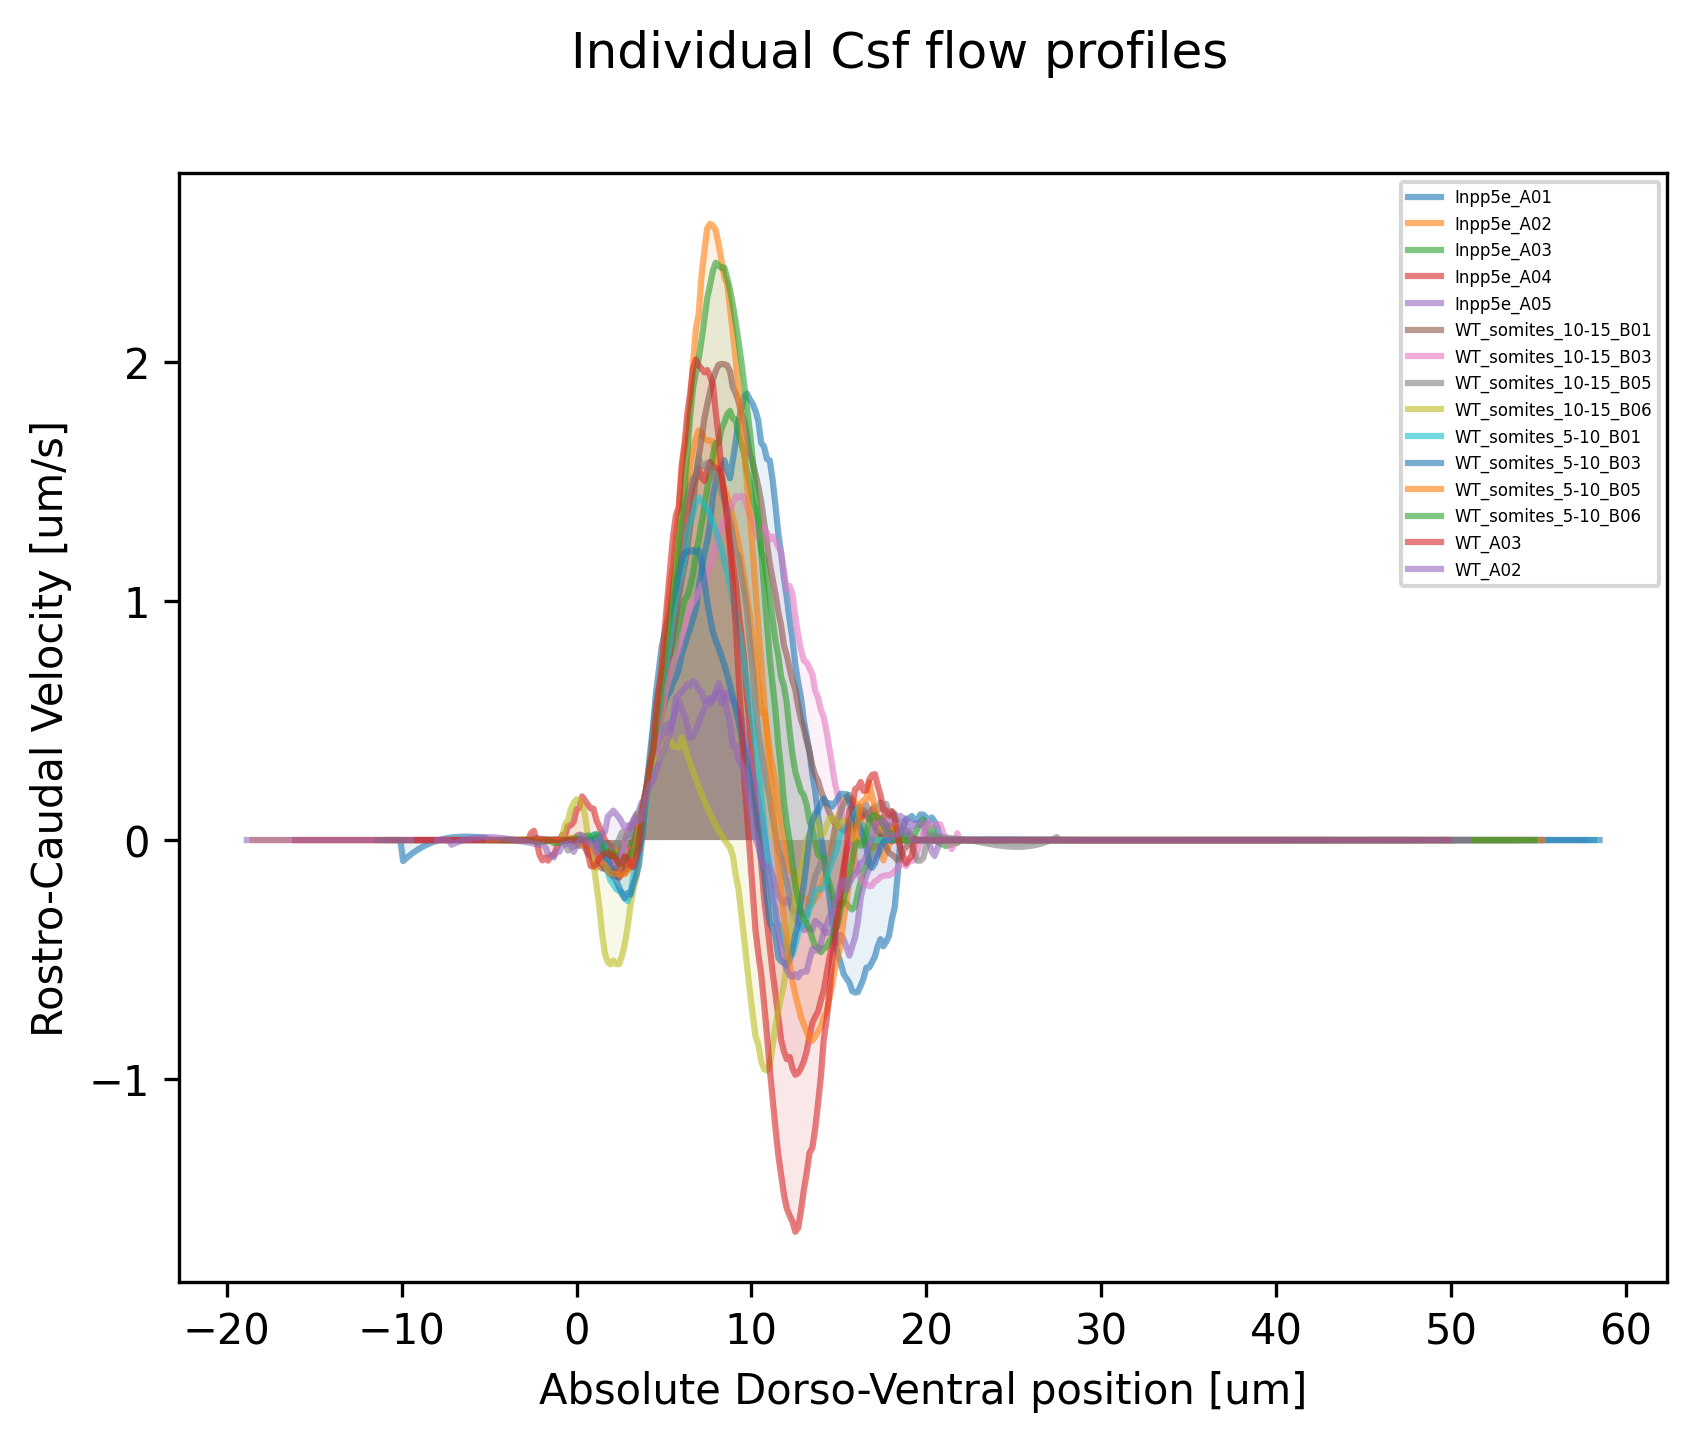

In [105]:
# plot settings
fig, axs = plt.subplots()

for name in data:
    cond = ""
    for i in color_dic:
        if i in name:
            cond = i
  
    try:
        plt.plot(data[name]['dv_axis'],data[name]['trace'],alpha=0.6,label=name)
        plt.fill_between(data[name]['dv_axis'],data[name]['trace'],alpha=.1)
    except:
        pass

# plot custom
plt.suptitle("Individual Csf flow profiles")
plt.xlabel("Absolute Dorso-Ventral position [um]")
plt.ylabel("Rostro-Caudal Velocity [um/s]")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize="4")


plt.show()
#pdf.savefig(fig)


# Each curve but colored by condition

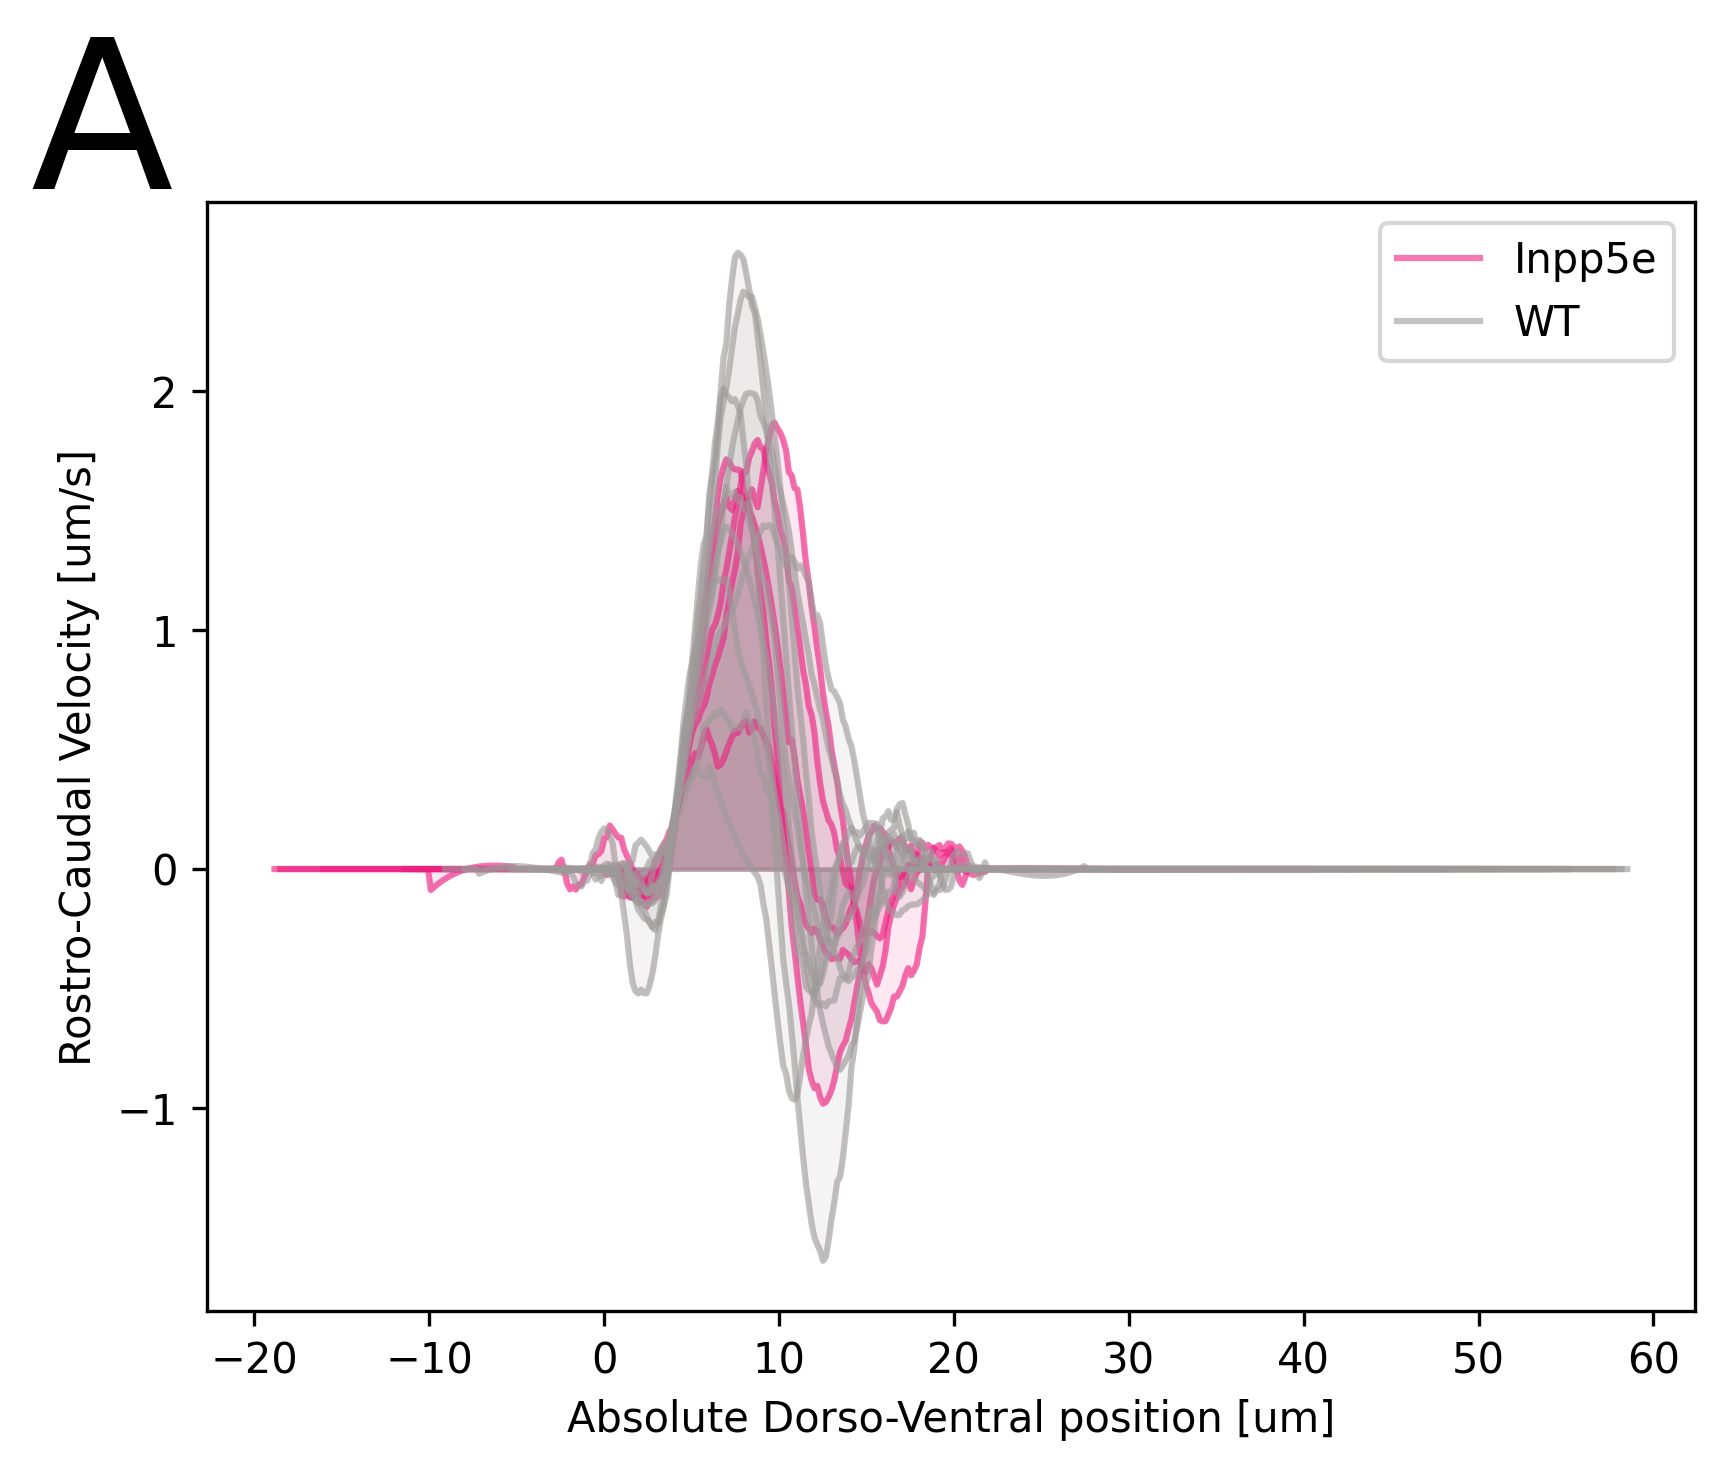

In [108]:
# plot settings
fig, axs = plt.subplots()

for name in data:
    cond = ""
    for i in color_dic:
        if i in name:
            cond = i
    try:
        plt.plot(data[name]['dv_axis'],data[name]['trace'],alpha=0.6,label=cond,color=color_dic[cond])
        
        plt.fill_between(data[name]['dv_axis'],data[name]['trace'],alpha=.1,color=color_dic[cond])
    except:
        pass

# plot custom
plt.suptitle("A",x=0.07,y=1,size=50)
plt.xlabel("Absolute Dorso-Ventral position [um]")
plt.ylabel("Rostro-Caudal Velocity [um/s]")
#plt.xlim(-5,20)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())


plt.show()

# Plot mean curves

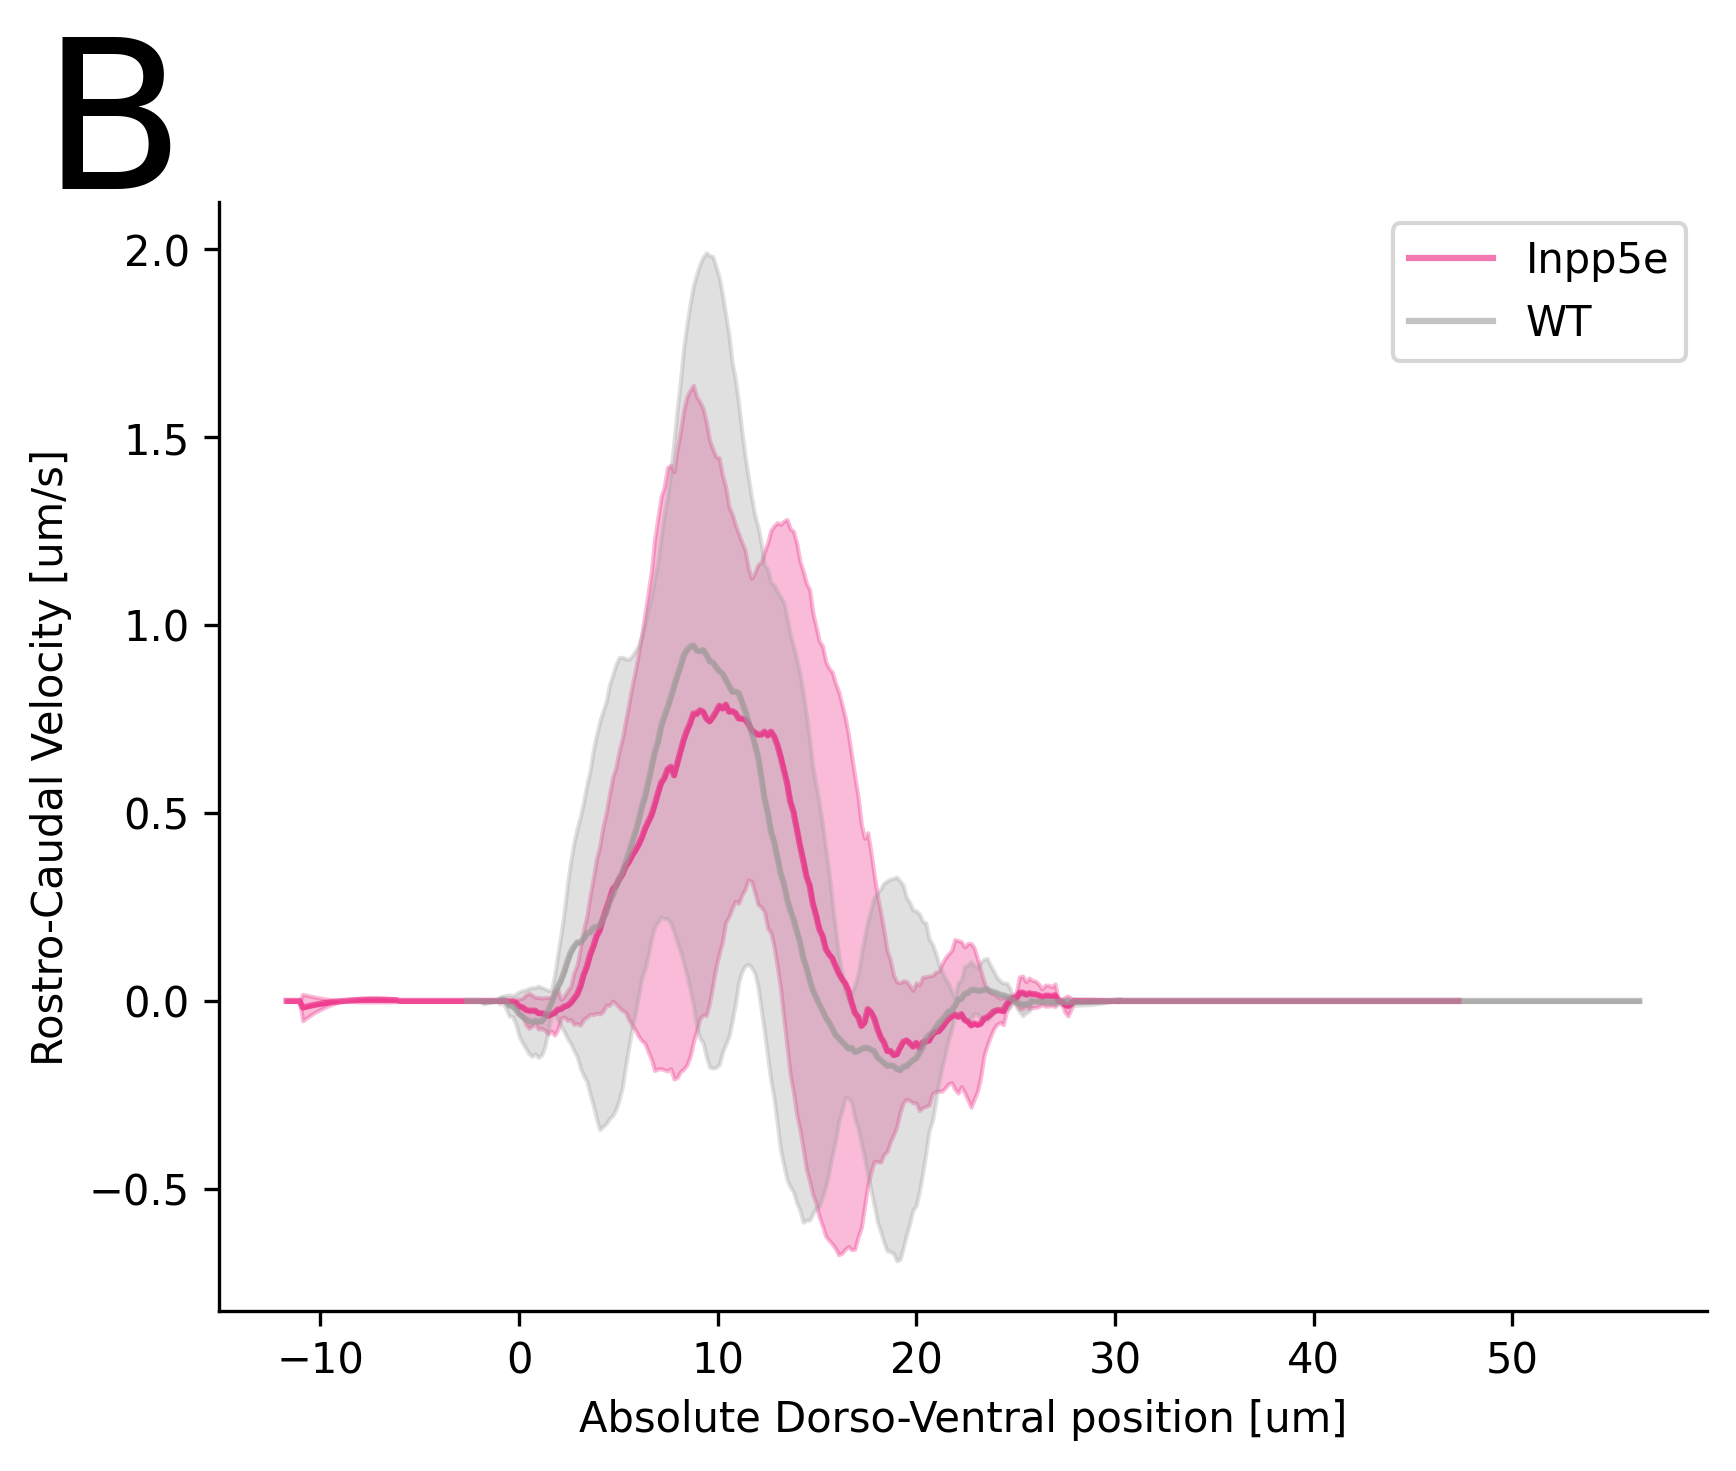

In [109]:
# plot settings
fig, axs = plt.subplots()

# standard error
se = {}
for i in color_dic: # init dictionary
    se[i] = []

for name in data:
    cond = ""
    for i in color_dic:
        if i in name:
            cond = i
    try:
        se[cond].append(data[name]['trace'])
    except:
        print("skipped:",name)
        pass

for sd_cond in se:
    se[sd_cond] = np.std(se[sd_cond],axis=0)    

# get all the traces in the same place
for name in data:
    cond = ""
    for i in color_dic:
        if i in name:
            cond = i
    try:
        groups[cond].append(data[name]["trace"].tolist())
    except:
        pass

# calculate the mean trace for each group

for group in groups:
    mean = np.mean(groups[group],axis=0)   # calculate the mean trace
    x = get_dv_axis(mean,0.3,0.1625,normalize=False)[0]
    try:
        plt.plot(x,mean,alpha=0.6,label=group,color=color_dic[group])
        plt.fill_between(x,mean,mean+se[group],alpha=.3,color=color_dic[group])
        plt.fill_between(x,mean,mean-se[group],alpha=.3,color=color_dic[group])
    except:
        print("skipped:",group)
        pass

# plot custom
plt.suptitle("B",x=0.07,y=1,size=50)
plt.xlabel("Absolute Dorso-Ventral position [um]")
plt.ylabel("Rostro-Caudal Velocity [um/s]")
#plt.xlim(0,1.5)
plt.legend()
plt.gca().get_legend().set_title("")
axs.spines[['right', 'top']].set_visible(False)
plt.show()

# PLOT MEAN CURVES with normalized dv-axis and relative rostrocaudal velocity (divided by total max velocity)

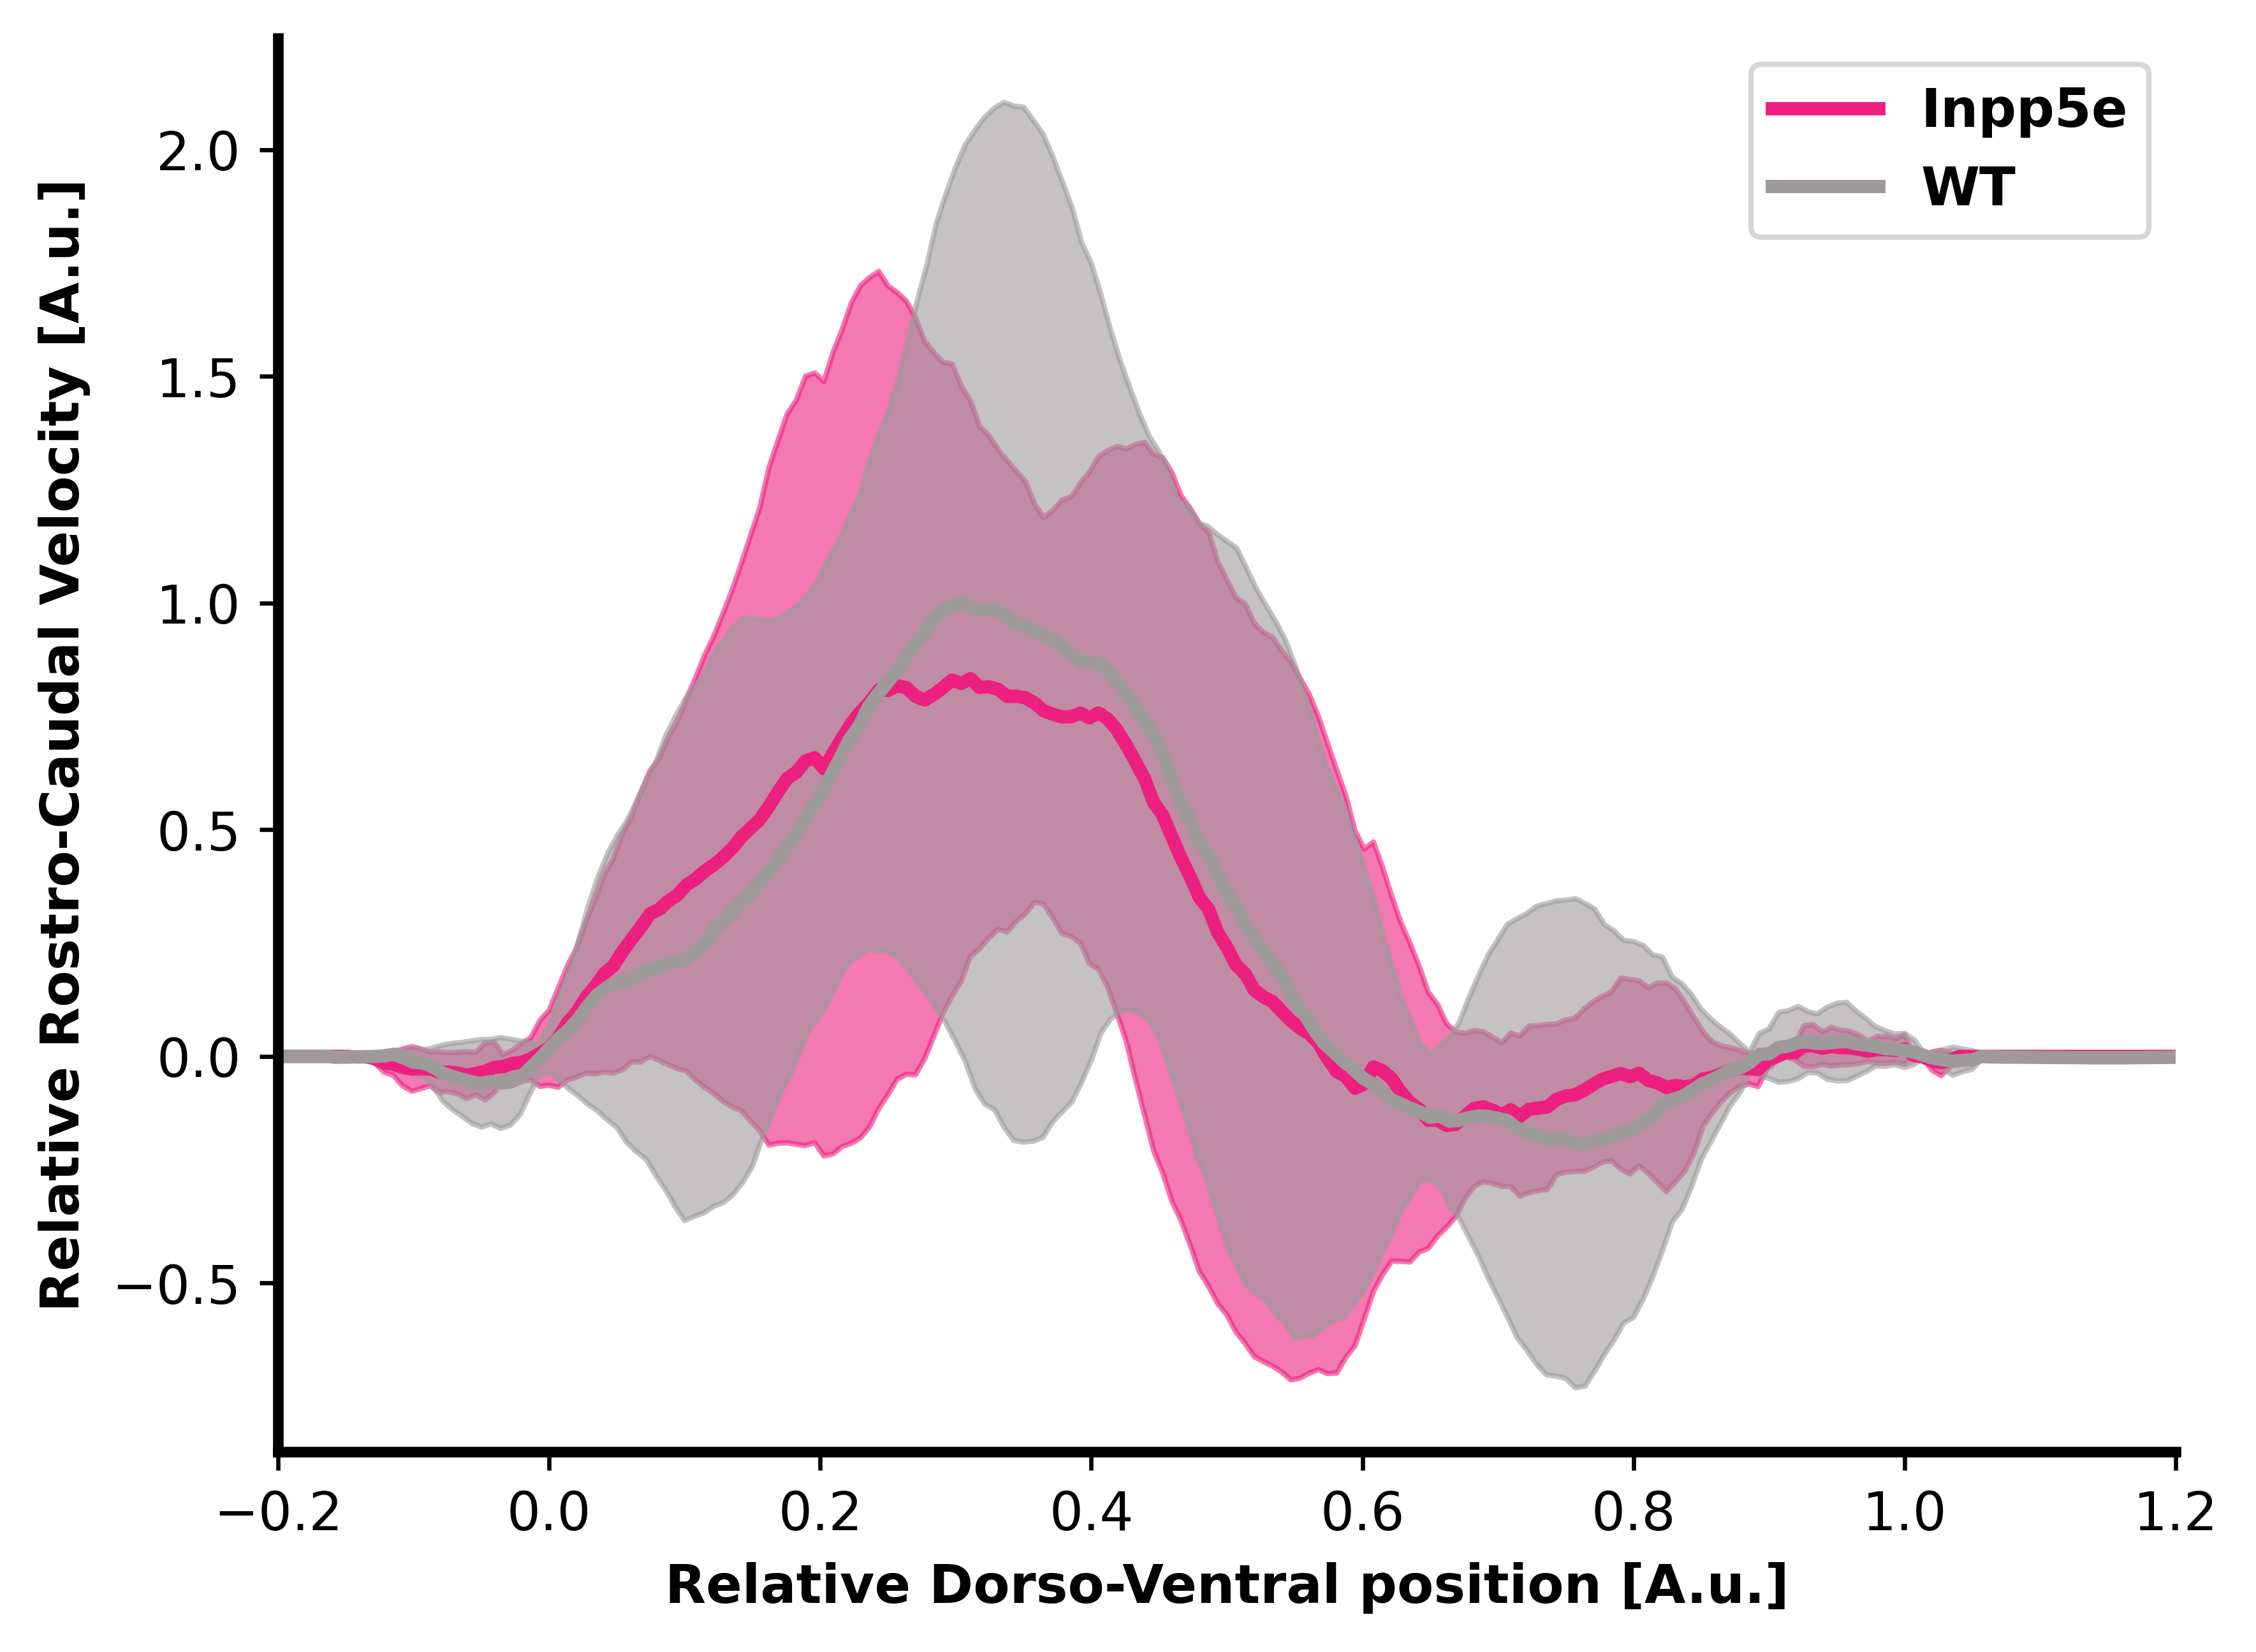

In [112]:
# plot settings
fig, axs = plt.subplots()

# get all the traces in the same place
for name in data:
    cond = ""
    for i in color_dic:
        if i in name:
            cond = i
    try:
        groups[cond].append(data[name]["trace"].tolist())
    except:
        pass

# calculate the mean trace for each group
max_x = 0   # not used because we already normalize to cc width for each sample
max_mean = 0
means = []
# for normalisation
for group in groups:
    mean = np.mean(groups[group],axis=0)   # calculate the mean trace
    x = get_dv_axis(mean,0.01,0.1625,-25,normalize=True)[0]  
    means.append(mean)
    # get max x to normalize the cc width (end of the canal is defined where the trace gets lower than 0.01)
    if x[np.where(mean>0.01)[0][-1]] > max_x:
        max_x = x[np.where(mean>0.01)[0][-1]]
for i in means:
    if np.max(i)>max_mean:
        max_mean = np.max(i)
for group in groups:
    mean = np.mean(groups[group],axis=0)   # calculate the mean trace
    x = get_dv_axis(mean,0.01,0.1625,normalize=True)[0]
    try:
        plt.plot(x,mean/max_mean,alpha=1,label=group,color=color_dic[group],linewidth=2.5)
        plt.fill_between(x,mean/max_mean,(mean-se[group])/max_mean,alpha=.6,color=color_dic[group])
        plt.fill_between(x,mean/max_mean,(mean+se[group])/max_mean,alpha=.6,color=color_dic[group])
    except:
        pass

# plot custom
#plt.suptitle("Mean Csf flow profiles t=0.8")
#plt.xlabel("Relative Dorso-Ventral position [A.u.]")
#plt.ylabel("Relative Rostro-Caudal Velocity [A.u.]")

plt.legend()
plt.gca().get_legend().set_title("")
# Access the current Axes instance
ax = plt.gca()

# Change the x-axis line weight
ax.spines['bottom'].set_linewidth(2)  

# Change the y-axis line weight
ax.spines['left'].set_linewidth(2)  

axs.spines[['right', 'top']].set_visible(False)

# Change the x-axis label and tick label font weight
ax.set_xlabel('Relative Dorso-Ventral position [A.u.]', weight='bold')


# Change the y-axis label and tick label font weight
ax.set_ylabel('Relative Rostro-Caudal Velocity [A.u.]', weight='bold')
# Set the legend text to bold
legend = ax.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')
plt.xlim(-0.2,1.2)
#save as pdf
plt.show()

# Plot with the model
TODO add padding to all the traces so that they are the same length its shite for now

Constant volume force (F_v) for dorsal: 0.1298064078784578 N.m^-3
Constant volume force (F_v) for dorsal: -0.1552851602947549 N.m^-3
Constant volume force (F_v) for dorsal: -0.11626459034562969 N.m^-3


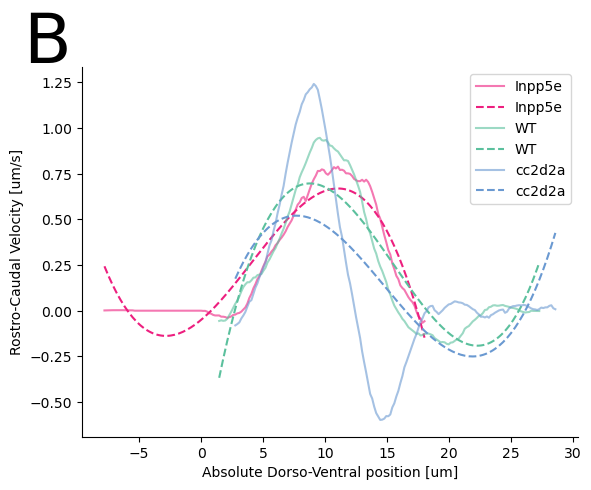

In [ ]:
# plot settings
fig, axs = plt.subplots()


# get all the traces in the same place
for name in data:
    cond = ""
    for i in color_dic:
        if i in name:
            cond = i
    try:
        groups[cond].append(data[name]["trace"].tolist())
    except:
        pass

# calculate the mean trace for each group
low = 20
high = 180
for group in groups:
    mean = np.mean(groups[group],axis=0)   # calculate the mean trace
    x = get_dv_axis(mean[low:high],0.2)[0]
    mean = mean[low:high]
    model = np.polyfit(x,mean,3)
    try:
        plt.plot(x,mean,alpha=0.6,label=group,color=color_dic[group])
        plt.plot(x,np.polyval(model,x),alpha=1,label=group,color=color_dic[group],linestyle='--')
        mu_csf = 10^-3 #[Pa/s]
        F_v = model[0]*2*mu_csf
        F_v = F_v*(10^6)
        print(f"Constant volume force (F_v) for dorsal: {F_v} N.m^-3")
    except:
        print("skipped:",group)
        pass
   
# plot custom
plt.suptitle("B",x=0.07,y=1,size=50)
plt.xlabel("Absolute Dorso-Ventral position [um]")
plt.ylabel("Rostro-Caudal Velocity [um/s]")

plt.legend()
plt.gca().get_legend().set_title("")
axs.spines[['right', 'top']].set_visible(False)
plt.show()


# PLOT EACH CURVE BUT COLORED BY CONDITION IN A GRID

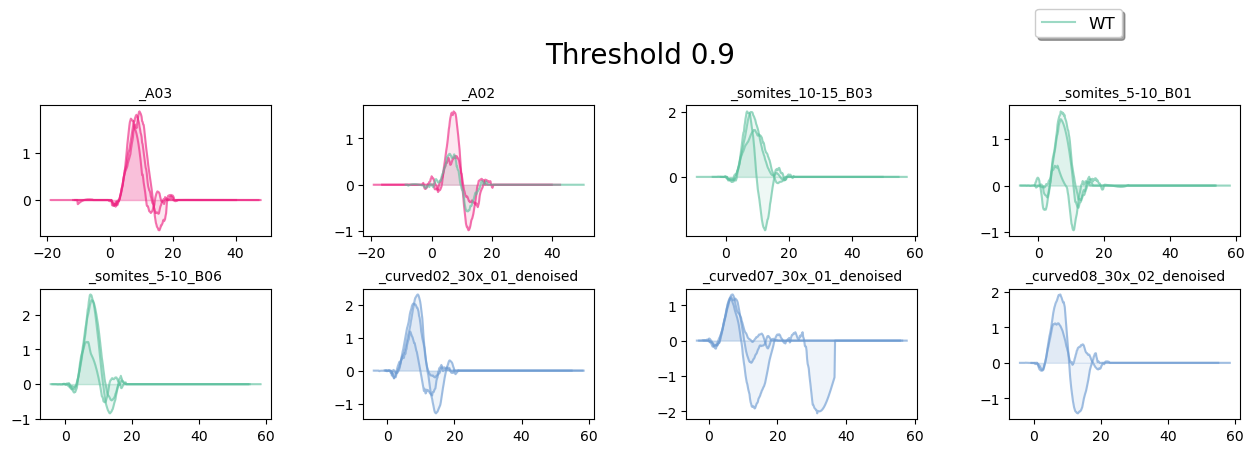

In [ ]:
count = 0
graph_count = 0
data = dict(sorted(data.items()))
plt.figure(figsize=(15,8))
for name in data:
    cond = ""
    
    for i in color_dic:
        if i in name:
            cond = i
            
    try:
        if count%len(color_dic) == 0:
            graph_count += 1

        plt.subplot(4,4,graph_count)
        plt.plot(data[name]['dv_axis'],data[name]['trace'],alpha=0.6,label=cond,color=color_dic[cond])
        plt.fill_between(data[name]['dv_axis'],data[name]['trace'],alpha=.1,color=color_dic[cond])
        plt.title(name.replace(cond,""),size=10)
        count+=1
            
    except:
        pass
    
# plot custom

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.05, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.suptitle("Threshold 0.9",size=20)

plt.subplot(4,4,4)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),fontsize=12,loc='upper center', bbox_to_anchor=(0.3, 1.8),
          fancybox=True, shadow=True)

plt.show()

# Max and min velocity boxplots

In [ ]:

# extract peak and min flow velocities
peaks = {}
caves = {}
for i in color_dic: # init dictionary
    caves[i] = []
    peaks[i] = []
for name in data:
    cond = ""
    
    for i in color_dic:
        if i in name:
            cond = i
    try:
        peaks[cond].append(np.max(data[name]['trace']))
        caves[cond].append(np.min(data[name]['trace']))
    except:
        print("skipped ",name)

peaks_data = [i for i in peaks.values()]
caves_data = [i for i in caves.values()]
print(caves_data)
labels = [i for i in peaks.keys()]


[[-0.6374094789652751, -0.2735341765990852, -0.2899500898125732, -0.9817963670981243, -0.4831685987686667], [-0.5741309063211317, -1.6384306342188264, -0.1538657213083093, -0.1935103146361645, -0.3124315969636697, -0.964109698496535, -0.4785544680423022, -0.5251207981059779, -0.8393955459445757, -0.4689775504710271], [-0.2046248166332014, -1.2953527449236026, -0.7548133639082872, -0.6289473071412722, -0.2224181320315407, -2.0559080567679624, -0.1982823852111027, -1.4250238405115292]]


We need to check first if our data is normally distributed

(array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 2., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.42824488, 0.44973999, 0.47123511, 0.49273022, 0.51422533,
        0.53572045, 0.55721556, 0.57871068, 0.60020579, 0.6217009 ,
        0.64319602, 0.66469113, 0.68618624, 0.70768136, 0.72917647,
        0.75067159, 0.7721667 , 0.79366181, 0.81515693, 0.83665204,
        0.85814715, 0.87964227, 0.90113738, 0.9226325 , 0.94412761,
        0.96562272, 0.98711784, 1.00861295, 1.03010806, 1.05160318,
        1.07309829, 1.09459341, 1.11608852, 1.13758363, 1.15907875,
        1.18057386, 1.20206898, 1.22356409, 1.2450592 , 1.26655432,
      

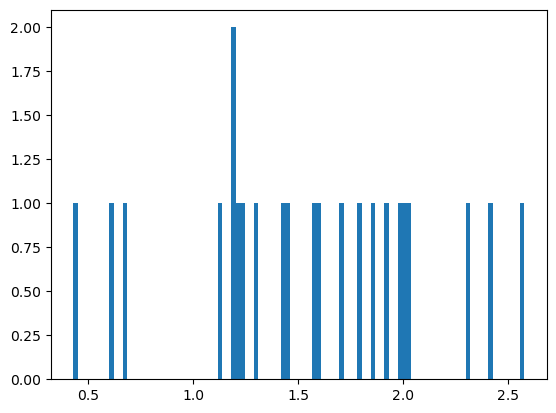

In [ ]:
all_data = flat_list = [item for sublist in peaks_data for item in sublist]
plt.hist(all_data,bins=100)

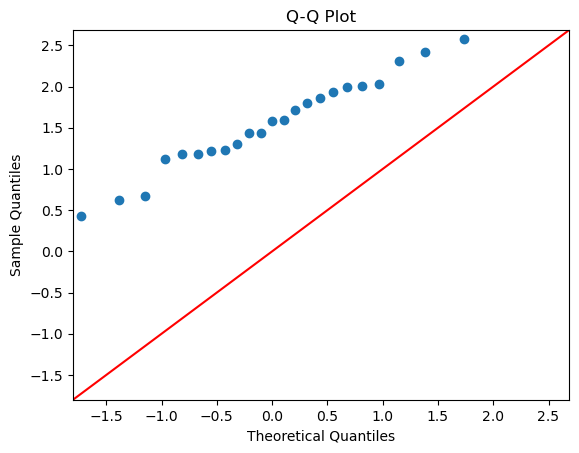

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Create a Q-Q plot using Statsmodels
all_data = flat_list = [item for sublist in peaks_data for item in sublist]

sm.qqplot(np.array(all_data), line='45')
plt.title('Q-Q Plot')
plt.show()


Next we can plot our data and do a t-test to check for significant differences between groups

╒═════════════════╤═══════════╤═════════╕
│ Combination     │   p-value │   p-adj │
╞═════════════════╪═══════════╪═════════╡
│ Inpp5e - cc2d2a │  1        │ 3       │
├─────────────────┼───────────┼─────────┤
│ Inpp5e - WT     │  0.953047 │ 2.85914 │
├─────────────────┼───────────┼─────────┤
│ WT - cc2d2a     │  0.633438 │ 1.90032 │
╘═════════════════╧═══════════╧═════════╛


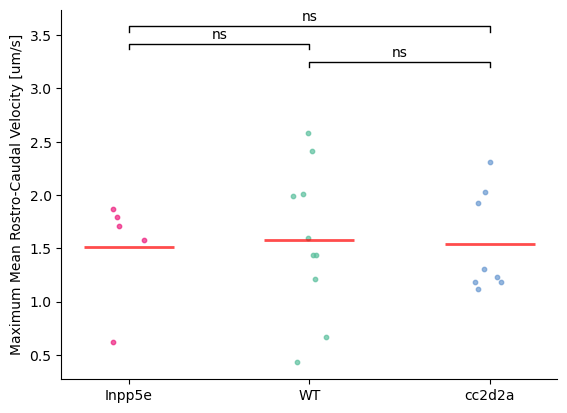

In [ ]:
from scipy import stats
import random
from tabulate import tabulate
# Check from the outside pairs of boxes inwards
ls = list(range(1, len(peaks_data) + 1))
combinations = [(ls[x], ls[x + y]) for y in reversed(ls) for x in range((len(ls) - y))]
significant_combinations = []

# Test every combination

for combination in combinations:
    data1 = peaks_data[combination[0] - 1]
    data2 = peaks_data[combination[1] - 1]
    # Significance
    U, p = stats.mannwhitneyu(data1, data2, alternative='two-sided')
    # bonferroni correction
    p_adj = p * len(combinations)
    if p < 0.05:
        significant_combinations.append([combination, p_adj, p])
    else:
        significant_combinations.append([combination, p_adj, p])
    #print(f"{list(groups.keys())[combination[0]-1]} - {list(groups.keys())[combination[1]-1]} | {p}")
    
print(tabulate([["{} - {}".format(list(groups.keys())[combination[0] - 1], list(groups.keys())[combination[1] - 1]), p, p_adj]
                    for combination, p_adj, p in significant_combinations],
                headers=["Combination", "p-value", "p-adj"], tablefmt="fancy_grid"))

# plot settings
fig, axs = plt.subplots()
colors = [i for i in color_dic.values()]

#boxplot
#bplot = plt.boxplot(caves_data, widths=0.6, patch_artist=True, labels = labels)

# individual points
for i, data in enumerate(peaks_data):
    x_values = [i + 1] * len(data)
    jitter = 0.1  # Adjust this value for the amount of jitter you want
    x_jittered = [val + (jitter * (2 * (random.random() - 0.5))) for val in x_values]
    plt.scatter(x_jittered, data, color=colors[i], alpha=0.7, s=10)

# mean values
mean_values = [np.mean(data) for data in peaks_data]
for i, mean in enumerate(mean_values):
    plt.hlines(mean, i + 0.75, i + 1.25, color='red', linewidth=2, alpha=0.7, )


# plot custom
plt.suptitle("",x=0.07,y=1.1,size=50)
plt.ylabel("Maximum Mean Rostro-Caudal Velocity [um/s]")

# fill with colors
#for patch, color in zip(bplot['boxes'], colors):
#        patch.set_facecolor(color)
#        patch.set_alpha(0.6)
#plt.setp(bplot['medians'], color='k')

plt.xticks(range(1, len(peaks_data) + 1), labels)
# Add Significance bars
# Get the y-axis limits
bottom, top = plt.ylim()
y_range = top - bottom
for i, significant_combination in enumerate(significant_combinations):
    # Columns corresponding to the 
    # sets of interest
    x1 = significant_combination[0][0]
    x2 = significant_combination[0][1]
    # What level is this bar among the bars above the plot?
    level = len(significant_combinations) - i
    # Plot the bar
    bar_height = (y_range * 0.07 * level) + top + 0.4
    bar_tips = bar_height - (y_range * 0.02)
    plt.plot(
        [x1, x1, x2, x2],
        [bar_tips, bar_height, bar_height, bar_tips], lw=1, c='k'
    )
    # Significance level
    p = significant_combination[1]
    if p < 0.001:
        sig_symbol = '***'
    elif p < 0.01:
        sig_symbol = '**'
    elif p < 0.05:
        sig_symbol = '*'
    else:
        sig_symbol = "ns"
    text_height = bar_height + (y_range * 0.01)
    plt.text((x1 + x2) * 0.5, text_height, sig_symbol, ha='center', va='bottom', c='k')
axs.spines[['right', 'top']].set_visible(False)
plt.show()

Min velocity

╒═════════════════╤═══════════╤═════════╕
│ Combination     │   p-value │   p-adj │
╞═════════════════╪═══════════╪═════════╡
│ Inpp5e - cc2d2a │   2.49883 │ 1.54436 │
├─────────────────┼───────────┼─────────┤
│ Inpp5e - WT     │   3       │ 1.54436 │
├─────────────────┼───────────┼─────────┤
│ WT - cc2d2a     │   1.54436 │ 1.54436 │
╘═════════════════╧═══════════╧═════════╛


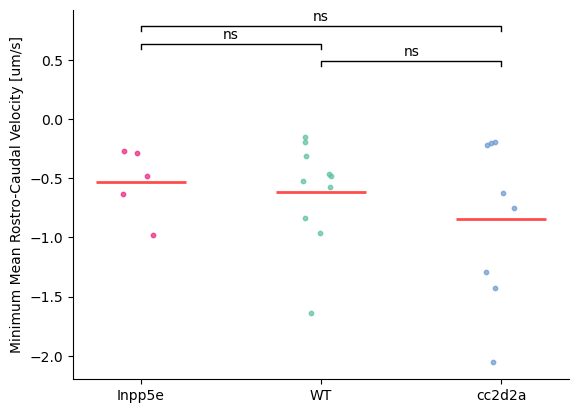

In [ ]:
from scipy import stats
import random
from tabulate import tabulate


# Check from the outside pairs of boxes inwards
ls = list(range(1, len(caves_data) + 1))
combinations = [(ls[x], ls[x + y]) for y in reversed(ls) for x in range((len(ls) - y))]
significant_combinations = []

# Test every combination

for combination in combinations:
    data1 = caves_data[combination[0] - 1]
    data2 = caves_data[combination[1] - 1]
    # Significance
    U, p = stats.mannwhitneyu(data1, data2, alternative='two-sided')
    # bonferroni correction
    p_adj = p * len(combinations)
    if p < 0.05:
        significant_combinations.append([combination, p_adj])
    else:
        significant_combinations.append([combination, p_adj])
    #print(f"{list(groups.keys())[combination[0]-1]} - {list(groups.keys())[combination[1]-1]} | {p}")

print(tabulate([["{} - {}".format(list(groups.keys())[combination[0] - 1], list(groups.keys())[combination[1] - 1]), p, p_adj]
                for combination, p in significant_combinations],
               headers=["Combination", "p-value", "p-adj"], tablefmt="fancy_grid"))

# plot settings
fig, axs = plt.subplots()
colors = [i for i in color_dic.values()]

#boxplot
#bplot = plt.boxplot(caves_data, widths=0.6, patch_artist=True, labels = labels)

# individual points
for i, data in enumerate(caves_data):
    x_values = [i + 1] * len(data)
    jitter = 0.1  # Adjust this value for the amount of jitter you want
    x_jittered = [val + (jitter * (2 * (random.random() - 0.5))) for val in x_values]
    plt.scatter(x_jittered, data, color=colors[i], alpha=0.7, s=10)

# mean values
mean_values = [np.mean(data) for data in caves_data]
for i, mean in enumerate(mean_values):
    plt.hlines(mean, i + 0.75, i + 1.25, color='red', linewidth=2, alpha=0.7, )


# plot custom
plt.suptitle("",x=0.07,y=1.1,size=50)
plt.ylabel("Minimum Mean Rostro-Caudal Velocity [um/s]")

# fill with colors
#for patch, color in zip(bplot['boxes'], colors):
#        patch.set_facecolor(color)
#        patch.set_alpha(0.6)
#plt.setp(bplot['medians'], color='k')

plt.xticks(range(1, len(caves_data) + 1), labels)
# Add Significance bars
# Get the y-axis limits
bottom, top = plt.ylim()
y_range = top - bottom
for i, significant_combination in enumerate(significant_combinations):
    # Columns corresponding to the datasets of interest
    x1 = significant_combination[0][0]
    x2 = significant_combination[0][1]
    # What level is this bar among the bars above the plot?
    level = len(significant_combinations) - i
    # Plot the bar
    bar_height = (y_range * 0.07 * level) + top + 0.4
    bar_tips = bar_height - (y_range * 0.02)
    plt.plot(
        [x1, x1, x2, x2],
        [bar_tips, bar_height, bar_height, bar_tips], lw=1, c='k'
    )
    # Significance level
    p = significant_combination[1]
    if p < 0.001:
        sig_symbol = '***'
    elif p < 0.01:
        sig_symbol = '**'
    elif p < 0.05:
        sig_symbol = '*'
    else:
        sig_symbol = "ns"
    text_height = bar_height + (y_range * 0.01)
    plt.text((x1 + x2) * 0.5, text_height, sig_symbol, ha='center', va='bottom', c='k')
axs.spines[['right', 'top']].set_visible(False)
plt.show()